# El tratamiendo de las variables categoricas

Cuando las variables son categorias(texto) lo normal es crear una valor dummy para pasarlo a entero 

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [26]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [27]:
dummy_gender = pd.get_dummies(df['Gender'],prefix="Gender")
dummy_city = pd.get_dummies(df['City Tier'],prefix="City")

In [28]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [29]:
dummy_city.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [30]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [31]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [32]:
df_new = df_new[column_names].join(dummy_city)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [62]:
feature_cols = [
 'Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
'Record']

In [63]:
x = df_new[feature_cols]

In [64]:
y = df_new['Total Spend']

In [65]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
print(lm.intercept_) 
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [67]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [68]:
# R Cuadrado
lm.score(x,y)

0.9179923586131016

### El modelo General quedaria

* Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Gender_Female' * -131.02501325554607 + 'Gender_Male'* 131.0250132555465 + 'City_Tier 1' * 76.7643260104955 + 'City_Tier 2' * 55.138974309232296 + 'City_Tier 3' * -131.90330031972775 + 'Record' * 772.2334457445637

### Modelos con valores categoricos
**Para crear los modelos predictivos se toma el modelo general y se eliminan las columnas que queremos predecir solo dejamos sus coeficientes**

    * Si es hombre y vive en CT1: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 131.0250132555465 + 76.7643260104955 + 'Record' * 772.2334457445637
    * Si es hombre y vive en CT2: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 131.0250132555465 + 55.138974309232296 + 'Record' * 772.2334457445637
    * Si es hombre y vive en CT3: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 131.0250132555465 - 131.90330031972775 + 'Record' * 772.2334457445637
    
    * Si es mujer y vive en CT1: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555465 + 76.7643260104955 + 'Record' * 772.2334457445637
    * Si es mujer y vive en CT2: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555465 + 55.138974309232296 + 'Record' * 772.2334457445637
    * Si es mujer y vive en CT3: Total Spend = -79.41713030136816 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555465 - 131.90330031972775 + 'Record' * 772.2334457445637
    
### Para abreviar los modelos se deben agrupar los numeros sin multiplicadores (sumas y restas)

    * Si es hombre y vive en CT1: Total Spend =  128.372208965 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637
    * Si es hombre y vive en CT2: Total Spend = 106.746857263 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637
    * Si es hombre y vive en CT3: Total Spend = -80.2954173655 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637
    
    * Si es mujer y vive en CT1: Total Spend = -133.677817546 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637
    * Si es mujer y vive en CT2: Total Spend = -155.303169248 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637
    * Si es mujer y vive en CT3: Total Spend = -342.345443877 + 'Monthly Income' * 0.14753898049205733 + 'Transaction Time' * 0.15494612549589615 + 'Record' * 772.2334457445637

In [69]:
df_new['prediction'] = -79.41713030136816 + df_new['Monthly Income'] * 0.14753898049205733 + df_new['Transaction Time'] * 0.15494612549589615 +df_new['Gender_Female'] * (-131.02501325554607) + df_new['Gender_Male'] * 131.0250132555465 + df_new['City_Tier 1'] * 76.7643260104955 + df_new['City_Tier 2'] * 55.138974309232296 + df_new['City_Tier 3'] * (-131.90330031972775) + df_new['Record'] * 772.2334457445637

In [70]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [71]:
SSD = np.sum((df_new['prediction']-df["Total Spend"])**2)
SSD

1517733985.3408165

In [72]:
RSE = np.sqrt(SSD/(len(df_new) - len(column_names) -1) )
RSE

804.157810990426

In [73]:
mean = np.mean(df["Total Spend"])
mean

6163.176415976714

In [74]:
error = RSE/mean
error

0.1304778180461976

## Eliminar variables dummy redundantes

In [75]:
dummy_gender = pd.get_dummies(df['Gender'],prefix ="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [76]:
dummy_city = pd.get_dummies(df['City Tier'],prefix ="City").iloc[:,1:]
dummy_city.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [77]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [78]:
feature_cols = [
 'Monthly Income',
 'Transaction Time',
 'Gender_Male',
 'City_Tier 2',
 'City_Tier 3',
    'Record']

In [79]:
x = df_new[feature_cols]
y = df['Total Spend']
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print(lm.intercept_)
print(lm.coef_)

-133.67781754642238
[ 1.47538980e-01  1.54946125e-01  2.62050027e+02 -2.16253517e+01
 -2.08667626e+02  7.72233446e+02]


In [82]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [83]:
lm.score(x,y)

0.9179923586131016

Los dos R2 son iguales lo que significa que el modelo no cambia sigue siendo el mismo solo se reduce el numero de variables predictorias

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205733),
* ('Transaction Time', 0.15494612549589615),
* ('Gender_Female', -131.02501325554607),
* ('Gender_Male', 131.0250132555465),
* ('City_Tier 1', 76.7643260104955),
* ('City_Tier 2', 55.138974309232296),
* ('City_Tier 3', -131.90330031972775),
* ('Record', 772.2334457445637)

Coeficintes tras enmascarar las variables dummy pertinentes

* ('Monthly Income', 0.14753898049205735),
* ('Transaction Time', 0.15494612549589748),
* ('Gender_Male', 262.05002651109527),
* ('City_Tier 2', -21.625351701262765),
* ('City_Tier 3', -208.66762633022327),
* ('Record', 772.2334457445639)

Los cambios se reflejan en 
* Gender_Male: 
    * antes -> 131.08, despues -> 262.05 = (131.02-(-131.02))
* Gender_Female: 
    * antes -> 131.08, despues -> 0
* CT1: 
    * antes -> 76.76, despues -> 0
* CT2: 
    * antes -> 55.14, despues -> -21.62 = (55.14 - 76.76)
* CT3: 
    * antes -> -131.90, despues -> -208.66 = (-131.90 - 76.76)
    
La variable que se queda se le resta la que se quito

### Lo que significa

siguen estando los 6 modelos pero el modelo de mujer de citi 1 seria el base para sacar los demas modelos ya se usaran los datos de arriba
por eso aumento intercet(alpha) y se repartio el valor de mujer y city 1 en las demas variables



## Transformacion de variables para conseguir una relacio no lineal

In [85]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [86]:
data_auto.shape

(406, 9)

In [87]:
import matplotlib.pyplot as plt

In [88]:
%matplotlib inline

Text(0.5,0,'Caballos de potencia')

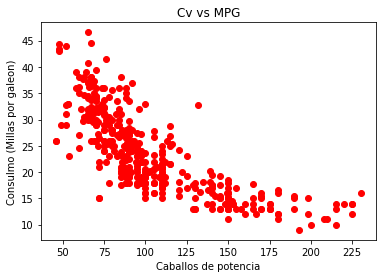

In [89]:
data_auto['mpg'] =  data_auto['mpg'].dropna()
data_auto['horsepower'] =  data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'],'ro')
plt.title("Cv vs MPG")
plt.ylabel('Consulmo (Millas por galeon)')
plt.xlabel('Caballos de potencia')

## Modelos de Regresion Lineal
* mpg = alpha + beta * data_auto['horsepower']

In [90]:
x_mean = np.mean(data_auto['horsepower'])
x = data_auto['horsepower'].fillna(x_mean)
y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

### Nota Data X
En este caso x es solo un arreglo entonces tenemos que convertirlo en DataSet
* Convertirlo usando pd.DataFrame(x)
* Convertirlo a arreglo bidimencional(matriz) x_data = x[:,np.newaxis]
    * Esto selecciona todo los datos de x (:) y le agregamos un nuevo valor(columna) en x (np.newaxis)
    
De las dos formas funciona

In [91]:
#Diferentes tipos de datos
x_dataset = pd.DataFrame(x)
x_data = x[:,np.newaxis]
type(x_dataset), type(x_data), type(x)

(pandas.core.frame.DataFrame, numpy.ndarray, pandas.core.series.Series)

In [92]:
lm = LinearRegression();
lm.fit(x_data,y);

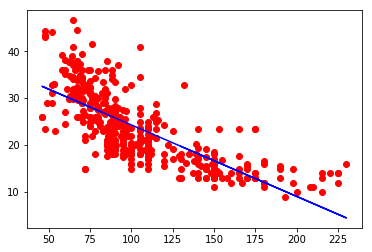

In [93]:
%matplotlib inline
plt.plot(x,y,'ro')
plt.plot(x,lm.predict(x_data), color= 'blue')

In [94]:
lm.score(x_data,y)

0.574653340645025

In [95]:
SSD = np.sum((y - lm.predict(x_data))**2) 
RSE = np.sqrt(SSD/(len(x_data)-1))
error = RSE / np.mean(y)
SSD, RSE, np.mean(y), error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

## Modelos de Regresion Cuadratico
* mpg = alpha + beta * (data_auto['horsepower'] ^ 2) 


In [96]:
x_data = x**2
x_data = x_data[:,np.newaxis]

In [97]:
lm = LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
lm.score(x_data,y)

0.4849887034823205

In [100]:
SSD = np.sum((y - lm.predict(x_data))**2) 
RSE = np.sqrt(SSD/(len(x_data)-1))
error = RSE / np.mean(y)
SSD, RSE, np.mean(y), error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

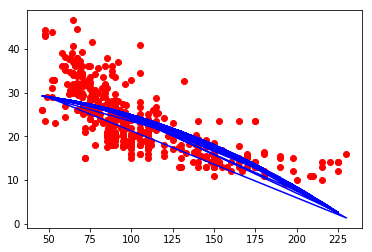

In [101]:
%matplotlib inline
plt.plot(x,y,'ro')
plt.plot(x,lm.predict(x_data), color= 'blue')

## Modelos de Regresion Lineal y Cuadratico
* mpg = alpha + beta * data_auto['horsepower'] + c *  data_auto['horsepower'] ^ 2 


In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [103]:
poly = PolynomialFeatures(degree=2)

In [104]:
x_data = poly.fit_transform(x[:,np.newaxis])
lm = linear_model.LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
lm.score(x_data,y)

0.6439066584257469

In [106]:
lm.intercept_

55.02619244708036

In [107]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

#### El modelo quedaria 
 mpg = 55.02619244708036 + (-0.43404318 * horsepower) + (0.00112615 * horsepower^2)

In [110]:
def regression_validation(x,y,y_predict):    
    SSD = np.sum((y - y_predict)**2) 
    RSE = np.sqrt(SSD/(len(x)-1))
    y_mean = np.mean(y)
    error = RSE / y_mean
    print ('SSD = '+str(SSD) + ', RSE = '+str(RSE)+', y_mean= '+str(y_mean)+', error='+str(error*100)+'%')
    


In [111]:
for d in range(2,10):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data,y)
    print("Regresion de grado " +str(d))
    print("r^2= "+str(lm.score(x_data,y)))
    print(lm.intercept_)
    print(lm.coef_)
    regression_validation(x_data,y,lm.predict(x_data))
    print("  ")

Regresion de grado 2
r^2= 0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD = 8636.180643524502, RSE = 4.61778115803654, y_mean= 23.51457286432162, error=19.63795466190689%
  
Regresion de grado 3
r^2= 0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD = 8622.56936742855, RSE = 4.614140736300908, y_mean= 23.51457286432162, error=19.622473106036676%
  
Regresion de grado 4
r^2= 0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD = 8566.799832491353, RSE = 4.5991947315797574, y_mean= 23.51457286432162, error=19.55891250126878%
  
Regresion de grado 5
r^2= 0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD = 8373.171393636556, RSE = 4.546921735442387, y_mean= 23.51457286432162, error=19.336612073193884%
  
Regresion de grado 6
r^2= 0.6572844624

## El problema de los outliers

Puntos muy alejados de la nube de puntos global

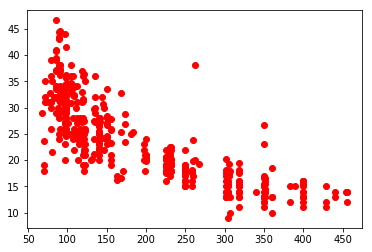

In [76]:
plt.plot(data_auto['displacement'],data_auto['mpg'],'ro')

In [77]:
x = data_auto['displacement'].fillna(data_auto['displacement'].mean())
x = x[:,np.newaxis]
y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lm.score(x,y)

0.6261049762826918

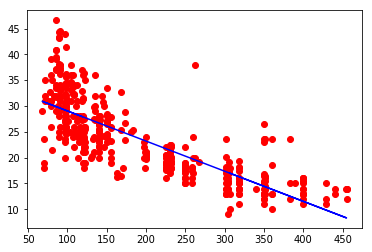

In [80]:
%matplotlib inline
plt.plot(x,y,'ro')
plt.plot(x,lm.predict(x),color= 'blue')

In [85]:
data_auto[(data_auto['displacement']>250)&(data_auto['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [88]:
data_auto[(data_auto['displacement']>300)&(data_auto['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [89]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [91]:
x = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
x = x[:,np.newaxis]
y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.6466514317531822

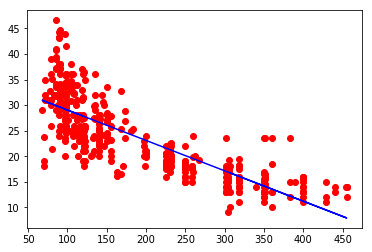

In [92]:
%matplotlib inline
plt.plot(x,y,'ro')
plt.plot(x,lm.predict(x),color= 'blue')

## Conclucion: Eliminar uno que otro outliers